Delegates Versus Expression Trees:

- Local queries, which use `Enumerable operators`, take `delegates`.
- Interpreted queries, which use `Queryable operators`, take `expression tree`s.

In [1]:
public class Product
{
public int ID { get; set; }
public string Description { get; set; }
public bool Discontinued { get; set; }
public DateTime LastSale { get; set; }
}

In [ ]:
public static IEnumerable<TSource> Where<TSource> (this
    IEnumerable<TSource> source, Func<TSource,bool> predicate);

public static IQueryable<TSource> Where<TSource> (this
    IQueryable<TSource> source, Expression<Func<TSource,bool>> predicate);

IEnumerable<Product> q1 = localProducts.Where   (p => !p.Discontinued);
IQueryable<Product> q2 = sqlProducts.Where      (p => !p.Discontinued);

In [ ]:
Func <Product, bool> predicate1 = p => !p.Discontinued;
IEnumerable<Product> q1 = localProducts.Where (predicate1);

Expression <Func <Product, bool>> predicate2 = p => !p.Discontinued;
IQueryable<Product> q2 = sqlProducts.Where (predicate2);

### Compiling expression trees

You can convert an ***expression tree*** to a `delegate` by calling `Compile`.

In [ ]:
public class Product
{
public int ID { get; set; }
public string Description { get; set; }
public bool Discontinued { get; set; }
public DateTime LastSale { get; set; }

public static Expression<Func<Product, bool>> IsSelling()
{
    return p => !p.Discontinued && p.LastSale > DateTime.Now.AddDays (-30);
}
}

var dbContext = new NutshellContext();
Product[] localProducts = dbContext.Products.ToArray();

IQueryable<Product> sqlQuery =
    dbContext.Products.Where (Product.IsSelling());
IEnumerable<Product> localQuery =
    localProducts.Where (Product.IsSelling().Compile());

### AsQueryable

The ***AsQueryable*** operator lets you write whole `queries` that can `run` over either local or `remote` sequences

In [ ]:
IQueryable<Product> FilterSortProducts (IQueryable<Product> input)
{
    //some code
}

var dbContext = new NutshellContext();

Product[] localProducts = dbContext.Products.ToArray();

var sqlQuery = FilterSortProducts (dbContext.Products);

var localQuery = FilterSortProducts (localProducts.AsQueryable());

### Expression Trees

<div dir="rtl" style="width: 80%; margin:auto;">
<p><strong>Expression Tree:</strong> نوعی ساختار داده‌ای است که در آن هر گره نمایانگر یک عملیات یا عملوند درون یک Expression است. این ساختار به صورت درختی است که هر گره می‌تواند یک عملگر (مانند جمع، تفریق) یا یک مقدار (مانند اعداد، متغیرها) باشد. عناصر ساده‌تر به عنوان گره‌های برگ نمایش داده می‌شوند در حالی که عملیات‌ها به عنوان گره‌های واسط قرار می‌گیرند و به ترتیب به گره‌های دیگر متصل می‌شوند.</p>

<p>درخت‌های بیانی امکان دستکاری و تحلیل بیان‌ها را در زمان اجرا فراهم می‌کنند، که این ویژگی در برنامه‌نویسی دینامیک بسیار مفید است. به عنوان مثال، در پلتفرم‌هایی مانند .NET، درخت‌های بیانی می‌توانند برای ایجاد پرس‌وجوهای پایگاه داده به صورت دینامیک استفاده شوند، جایی که بیان‌های C# به SQL تبدیل می‌شوند بدون اینکه نیاز به نوشتن پرس‌وجوی SQL به صورت دستی باشد. این امکان از طریق کتابخانه‌هایی مانند Entity Framework در دسترس است که می‌توانند Expression Trees را تحلیل و به کدهای پایگاه داده متناسب تبدیل کنند.</p>

</div>

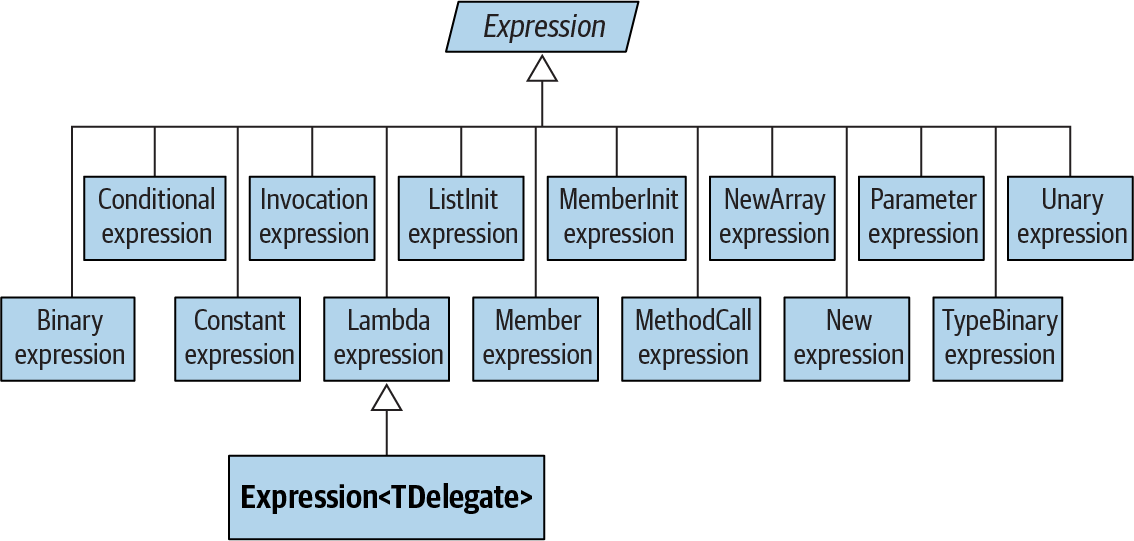

In [ ]:
using System.Linq.Expressions;

Expression<Func<string, bool>> f = s => s.Length < 5;

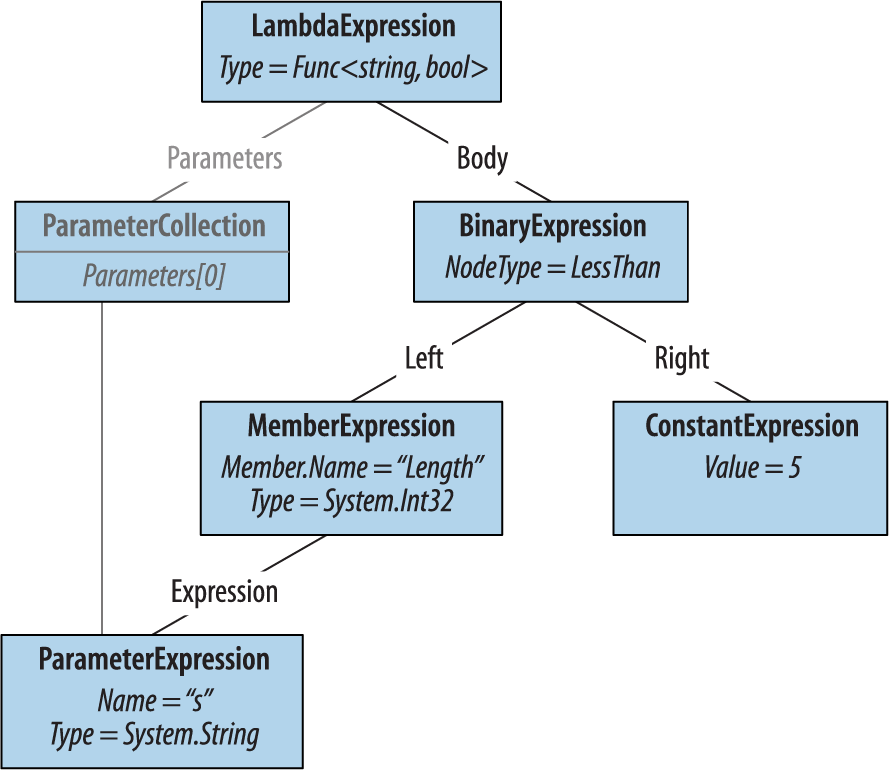

In [2]:
using System.Linq.Expressions;

Expression<Func<string, bool>> f = s => s.Length < 5;

Console.WriteLine (f.Body.NodeType); // LessThan
Console.WriteLine (((BinaryExpression) f.Body).Right); // 5

var left = (MemberExpression)((BinaryExpression) f.Body).Left;

Console.WriteLine(left.Member.Name);
Console.WriteLine(left.Type);

LessThan
5
Length
System.Int32


### Build Expression

The **principle** is that you `start` from the `bottom` of the tree and work your way `up`.

In [3]:
using System.Linq.Expressions;

ParameterExpression p = Expression.Parameter (typeof (string), "s");
MemberExpression stringLength = Expression.Property (p, "Length");
ConstantExpression five = Expression.Constant (5);
BinaryExpression comparison = Expression.LessThan (stringLength, five);

Expression<Func<string, bool>> lambda
    = Expression.Lambda<Func<string, bool>> (comparison, p);

Func<string, bool> runnable = lambda.Compile();

Console.WriteLine (runnable ("kangaroo")); // False
Console.WriteLine (runnable ("dog")); // True


False
True
